<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='latin1')

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#1 13.4% spam 86.6% ham


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

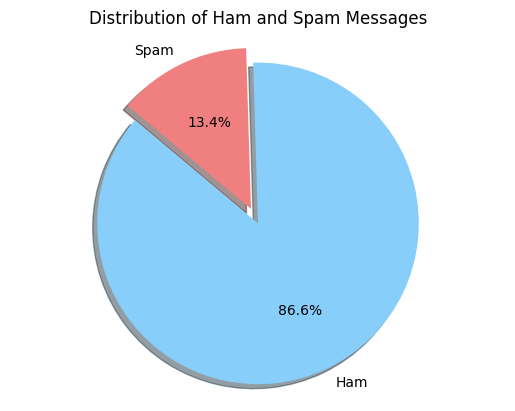

Percentage of ham messages: 86.59368269921033
Percentage of spam messages: 13.406317300789663


In [3]:

# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Calculate the percentage of ham and spam
ham_count = df[df['label'] == 'ham'].shape[0]
spam_count = df[df['label'] == 'spam'].shape[0]
total_count = df.shape[0]

ham_percentage = (ham_count / total_count) * 100
spam_percentage = (spam_count / total_count) * 100

# Create a pie chart
labels = ['Ham', 'Spam']
sizes = [ham_percentage, spam_percentage]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (i.e., 'Ham')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Ham and Spam Messages')
plt.show()

print("Percentage of ham messages:", ham_percentage)
print("Percentage of spam messages:", spam_percentage)


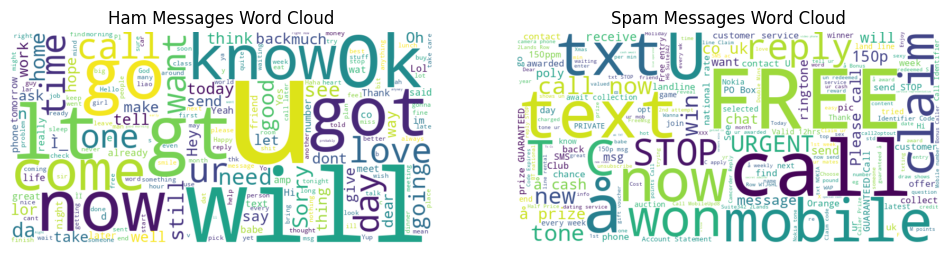

In [5]:


# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Create separate dataframes for ham and spam messages
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']

# Combine all messages for ham and spam
ham_text = ' '.join(ham_df['message'])
spam_text = ' '.join(spam_df['message'])

# Generate word clouds for ham and spam messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import numpy as np
from sklearn.manifold import TSNE

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Tokenize and create word vectors using SpaCy
def get_word_vectors(text):
    doc = nlp(text)
    return [token.vector for token in doc if not token.is_stop]

df['word_vectors'] = df['message'].apply(get_word_vectors)

# Convert word vectors to numpy array


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5572 samples in 0.031s...
[t-SNE] Computed neighbors for 5572 samples in 31.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5572
[t-SNE] Computed conditional probabilities for sample 2000 / 5572
[t-SNE] Computed conditional probabilities for sample 3000 / 5572
[t-SNE] Computed conditional probabilities for sample 4000 / 5572
[t-SNE] Computed conditional probabilities for sample 5000 / 5572
[t-SNE] Computed conditional probabilities for sample 5572 / 5572
[t-SNE] Mean sigma: 4.887551
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.848473
[t-SNE] KL divergence after 1000 iterations: 2.592443


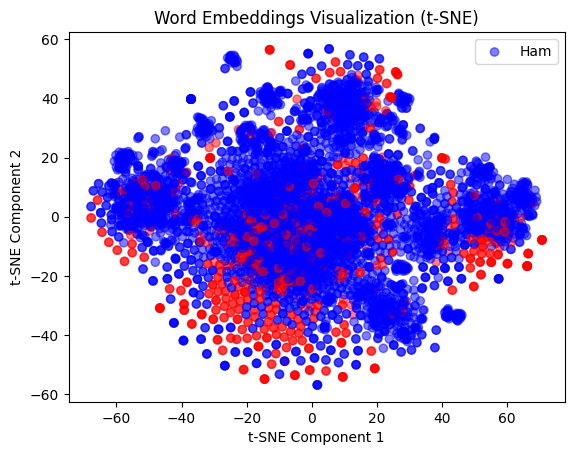

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad word vectors to have the same length
max_length = max(len(vec) for vec in df['word_vectors'].values)
padded_X = pad_sequences(df['word_vectors'].tolist(), maxlen=max_length, padding='post', dtype='float32')

# Reshape padded_X to have a compatible shape for t-SNE
padded_X_reshaped = padded_X.reshape(padded_X.shape[0], -1)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42,verbose=1)
embedded_X = tsne.fit_transform(padded_X_reshaped)

# Create scatter plot based on labels
colors = {'ham': 'blue', 'spam': 'red'}
plt.scatter(embedded_X[:, 0], embedded_X[:, 1], c=df['label'].apply(lambda x: colors[x]), alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Word Embeddings Visualization (t-SNE)")
plt.legend(['Ham', 'Spam'])
plt.show()


In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
import pyLDAvis
from pyLDAvis import gensim_models

import pyLDAvis.gensim as gensimvis

# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Preprocess the text data
def preprocess(text):
    return preprocess_string(text)

# Apply preprocessing to the messages
df['processed_message'] = df['message'].apply(preprocess)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_message'])

# Convert the dictionary into a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_message']]

# Train LDA model on the message corpus
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Visualize topics using pyLDAvis
lda_display = gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
# gensimvis.save_html(lda_display, "topic_visualization.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# gensimvis.save_html(lda_display, "topic_visualization.html")
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
!pip install pyspellchecker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.0 MB/s eta 0:00:00


#2 Using f1_weighted for eval of model

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
from sklearn.compose import ColumnTransformer

# Filter out warnings
warnings.filterwarnings('ignore')

from CustomPreprocessorSpacy import SpacyPreprocessor

#3


## i) Spacy and Tfidf

In [17]:

from CustomPreprocessorSpacy import SpacyPreprocessor

# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preprocessing: Convert text to lowercase and remove punctuation
# df['message'] = df['message'].str.lower().str.replace('[^\w\s]', '', regex=True)
# df['message'] = df['message'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

sp = SpacyPreprocessor('en_core_web_sm')
df['message'] = sp.transform(df['message'].values)


sampled_df = df.sample(frac=0.05, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sampled_df['message'], sampled_df['label'], test_size=0.2, random_state=42)

# Convert DataFrame to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()



X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

sp = SpacyPreprocessor('en_core_web_sm')
X_train = sp.transform(X_train)
X_test = sp.transform(X_test)

# Define TF-IDF parameters
tfidf_params = {
    'min_df': 5,         # Term must appear in at least 5 documents
    'max_df': 0.7,       # Ignore terms that appear in more than 70% of the documents
    'max_features': 5000,# Consider only the top 5000 features
    'ngram_range': (1, 2),  # Consider both unigrams and bigrams
    'stop_words': 'english'  # Remove common English stop words
}

# Create a dictionary of classifiers and their respective parameter grids for grid search
# Define class weights for imbalanced data
class_weights = ['balanced', 'balanced', 'balanced', 'balanced', 'balanced']

# Create a dictionary of classifiers and their respective parameter grids for grid search
classifiers = {
    # 'MultinomialNB': {
    #     'model': MultinomialNB(),
    #     'params': {},
    #     'class_weights': class_weights[0]
    # },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
        'class_weights': class_weights[1]
    },
    'SVC': {
        'model': SVC(),
        'params': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__kernel': ['linear', 'rbf']},
        'class_weights': class_weights[2]
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {'clf__max_depth': [None, 10, 20, 50, 100]},
        'class_weights': class_weights[3]
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {'clf__n_estimators': [10, 50, 100, 200, 500]},
        'class_weights': class_weights[4]
    }
}


best_weighted_f1_score = 0
best_model = None
best_clf_name = None

for clf_name, clf_details in classifiers.items():
    print(f"Evaluating {clf_name}...")

    tfidf_vectorizer = TfidfVectorizer(**tfidf_params)

    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('clf', clf_details['model'])
    ])

    grid_search = GridSearchCV(pipeline, clf_details['params'], n_jobs=-1, verbose=1,scoring='f1_weighted')
    grid_search.fit(X_train, y_train)

    print("Best parameters found:")
    print(grid_search.best_params_)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------\n")

    # Save the best model if it achieves a higher accuracy
    if accuracy > best_weighted_f1_score:
        best_weighted_f1_score = accuracy
        best_model = grid_search.best_estimator_
        best_clf_name = clf_name

# Save the best model
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_clf_name}.joblib")
    print(f"Best model saved as best_model_{best_clf_name}.joblib")

# Reload the best model
best_model = joblib.load(f"best_model_{best_clf_name}.joblib")

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data using the best model:", accuracy)
print(classification_report(y_test, y_pred))



Evaluating LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:
{'clf__C': 10}
Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.67      0.57      0.62         7

    accuracy                           0.91        56
   macro avg       0.80      0.77      0.78        56
weighted avg       0.91      0.91      0.91        56

-------------------------------------------

Evaluating SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'clf__C': 1, 'clf__kernel': 'linear'}
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.80      0.57      0.67         7

    accuracy                           0.93        56
   macro avg       0.87      0.78      0.81        56
weighted avg       0.92   

## plot


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

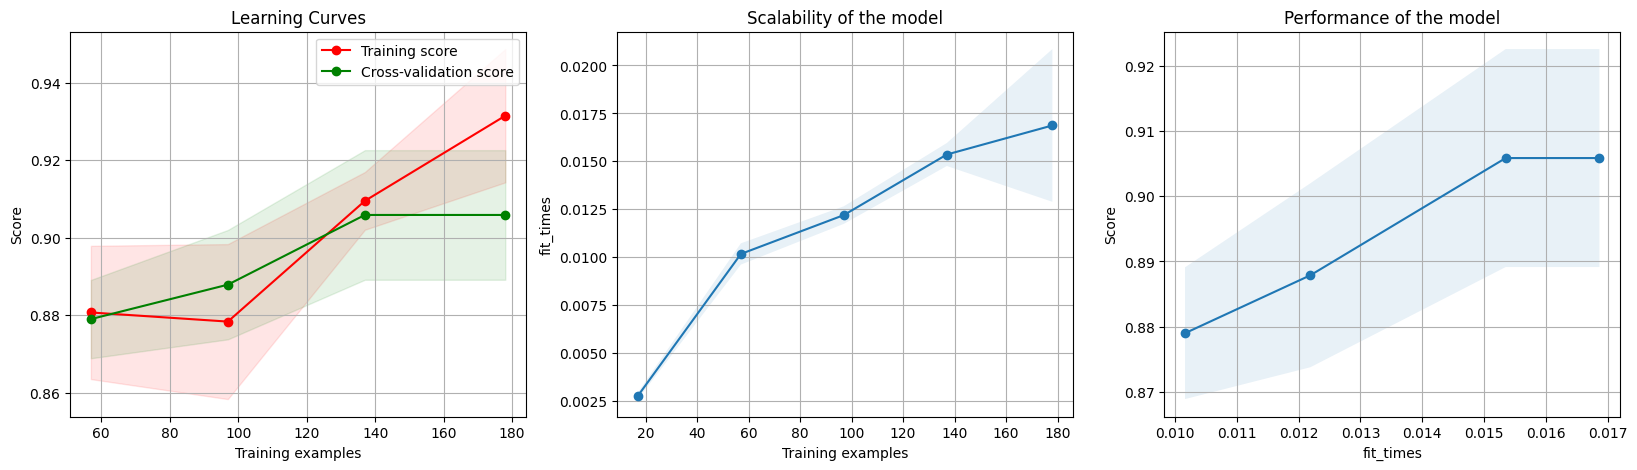

In [19]:
from plot_learning_curve import plot_learning_curve
plot_learning_curve(best_model, 'Learning Curves',
                    X_train, y_train, n_jobs=-1)

## ii) Text and bert features

### GPU

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from spellchecker import SpellChecker
import spacy
from transformers import pipeline as t_pipe
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm import tqdm




class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.spell_checker = SpellChecker()
        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        self.bert_nlp = t_pipe('feature-extraction', model='bert-base-uncased', tokenizer='bert-base-uncased')

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        features = []
        for text in tqdm(X):
            doc = self.nlp(text)
            embeddings = self.bert_nlp(text)

            word_count = len(doc)
            char_count = len(text)
            digit_count = sum(c.isdigit() for c in text)
            exclamation_count = text.count('!')
            number_count = sum(c.isdigit() for c in text.split())
            noun_count = sum(1 for token in doc if token.pos_ == 'NOUN')
            propernoun_count = sum(1 for token in doc if token.pos_ == 'PROPN')
            aux_count = sum(1 for token in doc if token.pos_ == 'AUX')
            verb_count = sum(1 for token in doc if token.pos_ == 'VERB')
            adj_count = sum(1 for token in doc if token.pos_ == 'ADJ')
            named_entity_count = len(doc.ents)
            spelling_mistakes = len(self.spell_checker.unknown(text.split()))
            pooled_embedding = np.mean(embeddings, axis=1).squeeze()

            features.append([
                word_count, char_count, digit_count, exclamation_count, number_count,
                noun_count, propernoun_count, aux_count, verb_count, adj_count,
                named_entity_count, spelling_mistakes
            ] + list(pooled_embedding))
        return features


# Load the dataset into a pandas DataFrame
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

fe = FeatureExtractor()
df['message_features'] = fe.transform(df['message'])
df.to_csv('spam_bert_tfe.csv')

### training on text and bert features



In [20]:
df_fe = pd.read_csv('spam_bert_tfe.csv')
df_fe['message_features'] = df_fe['message_features'].apply(ast.literal_eval)


df_fe = pd.DataFrame(df_fe['message_features'].apply(pd.Series))
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

sp = SpacyPreprocessor('en_core_web_sm')
df['message'] = sp.transform(df['message'].values)


df_fe['label'] = df['label']
# df_fe['message'] = df['message']




sampled_df = df_fe.sample(frac=0.1, random_state=42)
X = sampled_df.drop(columns=['label'])
y= sampled_df['label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





log_reg_clf = LogisticRegression()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Define parameter grids for grid search
param_grids = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C values for Logistic Regression
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C and gamma values for SVC
    {'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30]},  # max_depth values for Decision Tree
    {'classifier__n_estimators': [10, 50, 100, 200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2']}  # n_estimators and max_features values for Random Forest
]

# List of classifiers and corresponding parameter grids
classifiers = [log_reg_clf, svc_clf, dt_clf, rf_clf]
import joblib

best_weighted_f1_score = 0
best_model = None
best_clf_name = None

for classifier, param_grid in zip(classifiers, param_grids):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted',n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Classifier:", classifier.__class__.__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------\n")

    # Save the best model if it achieves a higher accuracy
    if accuracy > best_weighted_f1_score:
        best_weighted_f1_score = accuracy
        best_model = grid_search.best_estimator_
        best_clf_name = clf_name

# Save the best model
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_clf_name}_fe.joblib")
    print(f"Best model saved as best_model_{best_clf_name}_fe.joblib")

# Reload the best model
best_model = joblib.load(f"best_model_{best_clf_name}_fe.joblib")

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data using the best model:", accuracy)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classifier: LogisticRegression
Best Parameters: {'classifier__C': 1}
Accuracy: 0.9910714285714286
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.93      1.00      0.96        13

    accuracy                           0.99       112
   macro avg       0.96      0.99      0.98       112
weighted avg       0.99      0.99      0.99       112

-------------------------------------------

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Classifier: SVC
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.001}
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        13

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1

##plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

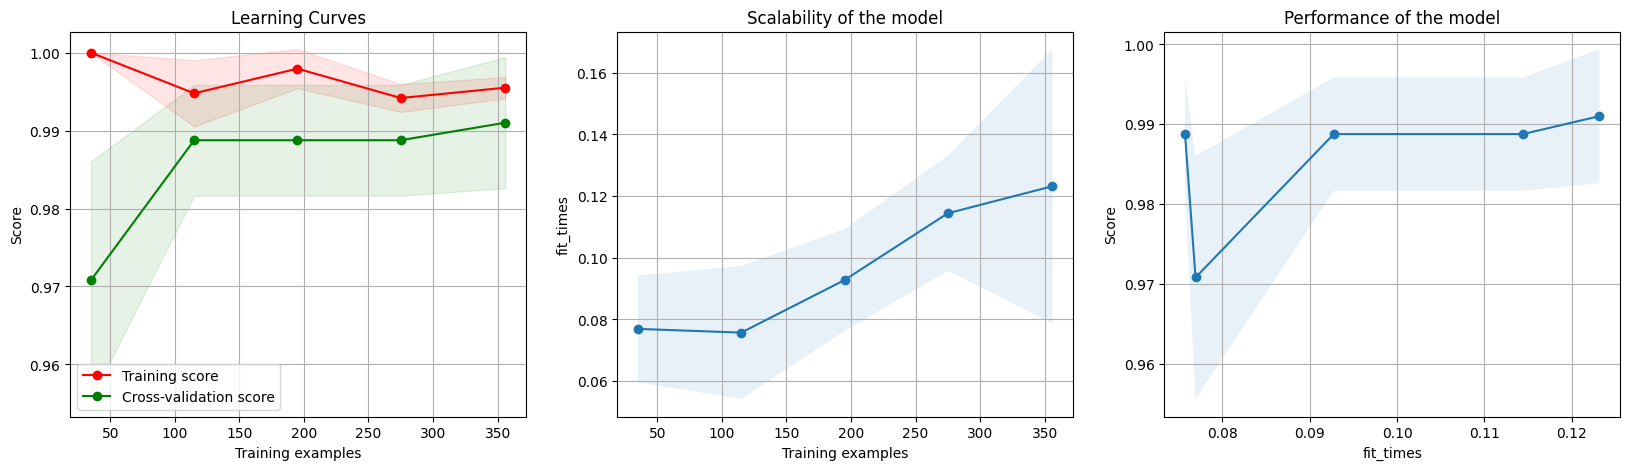

In [21]:

from plot_learning_curve import plot_learning_curve
plot_learning_curve(best_model, 'Learning Curves',
                    X_train, y_train, n_jobs=-1)


### training on just the text features

In [23]:




df_fe = pd.read_csv('spam_bert_tfe.csv')
df_fe['message_features'] = df_fe['message_features'].apply(ast.literal_eval)


df_fe = pd.DataFrame(df_fe['message_features'].apply(pd.Series))
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})




df_fe = df_fe.iloc[:, :12]
df_fe.head()

df_fe['label'] = df['label']
sp = SpacyPreprocessor('en_core_web_sm')
df['message'] = sp.transform(df['message'].values)
# df_fe['message'] = df['message']


sampled_df = df_fe.sample(frac=0.1, random_state=42)
X = sampled_df.drop(columns=['label'])
y= sampled_df['label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_clf = LogisticRegression()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Define parameter grids for grid search
param_grids = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C values for Logistic Regression
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C and gamma values for SVC
    {'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30]},  # max_depth values for Decision Tree
    {'classifier__n_estimators': [10, 50, 100, 200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2']}  # n_estimators and max_features values for Random Forest
]

# List of classifiers and corresponding parameter grids
classifiers = [log_reg_clf, svc_clf, dt_clf, rf_clf]
import joblib

best_weighted_f1_score = 0
best_model = None
best_clf_name = None

for classifier, param_grid in zip(classifiers, param_grids):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted',n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Classifier:", classifier.__class__.__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------\n")

    # Save the best model if it achieves a higher accuracy
    if accuracy > best_weighted_f1_score:
        best_weighted_f1_score = accuracy
        best_model = grid_search.best_estimator_
        best_clf_name = clf_name

# Save the best model
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_clf_name}_fec.joblib")
    print(f"Best model saved as best_model_{best_clf_name}_fec.joblib")

# Reload the best model
best_model = joblib.load(f"best_model_{best_clf_name}_fec.joblib")

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data using the best model:", accuracy)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classifier: LogisticRegression
Best Parameters: {'classifier__C': 100}
Accuracy: 0.9821428571428571
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.92      0.92      0.92        13

    accuracy                           0.98       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.98      0.98      0.98       112

-------------------------------------------

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Classifier: SVC
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.001}
Accuracy: 0.9732142857142857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.92      0.85      0.88        13

    accuracy                           0.97       112
   macro avg       0.95      0.92      0.93       112
weighted avg       0.

## plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

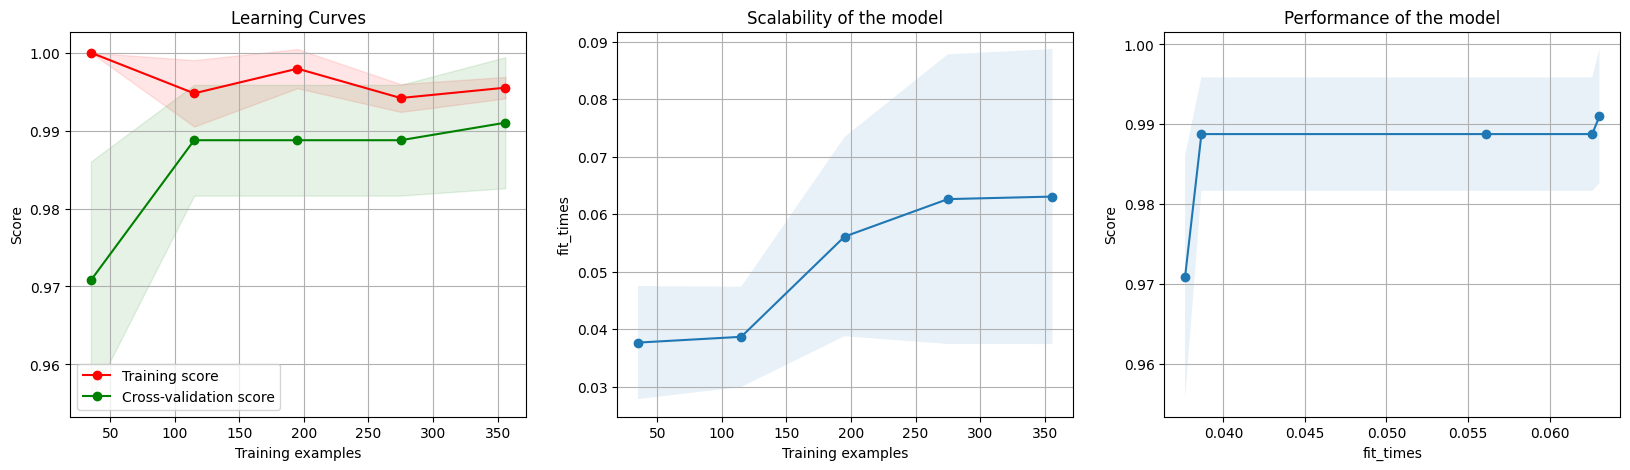

In [22]:
from plot_learning_curve import plot_learning_curve
plot_learning_curve(best_model, 'Learning Curves',
                    X_train, y_train, n_jobs=-1)

## iii) Both embeddings and features

### <font color="red">training on tfidf,text,bert features
</font>




In [25]:




df_fe = pd.read_csv('spam_bert_tfe.csv')
df_fe['message_features'] = df_fe['message_features'].apply(ast.literal_eval)


df_fe = pd.DataFrame(df_fe['message_features'].apply(pd.Series))
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})




# df_fe = df_fe.iloc[:, :12]
# df_fe.head()

sp = SpacyPreprocessor('en_core_web_sm')
df['message'] = sp.transform(df['message'].values)
df_fe['label'] = df['label']
df_fe['message'] = df['message']






df_fe.columns = df_fe.columns.astype(str)
sampled_df = df_fe.sample(frac=0.1, random_state=42)
X = sampled_df.drop(columns=['label'])
y= sampled_df['label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_clf = LogisticRegression()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Define parameter grids for grid search
param_grids = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C values for Logistic Regression
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C and gamma values for SVC
    {'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30]},  # max_depth values for Decision Tree
    {'classifier__n_estimators': [10, 50, 100, 200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2']}  # n_estimators and max_features values for Random Forest
]

# List of classifiers and corresponding parameter grids
classifiers = [log_reg_clf, svc_clf, dt_clf, rf_clf]
import joblib

best_weighted_f1_score = 0
best_model = None
best_clf_name = None

tfidf_transformer = TfidfVectorizer()

scaler = StandardScaler()

# Define ColumnTransformer for applying transformers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf_transformer, 'message'),  # Assuming 'message' is the column name containing text data
        ('scaler', scaler, [col for col in X.columns if col != 'message'])  # Applying scaler to numerical columns
    ],
    remainder='passthrough'  # Ensure other columns not mentioned are passed through
)

for classifier, param_grid in zip(classifiers, param_grids):
    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted',n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Classifier:", classifier.__class__.__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------\n")

    # Save the best model if it achieves a higher accuracy
    if accuracy > best_weighted_f1_score:
        best_weighted_f1_score = accuracy
        best_model = grid_search.best_estimator_
        best_clf_name = clf_name

# Save the best model
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_clf_name}_fe_full.joblib")
    print(f"Best model saved as best_model_{best_clf_name}_fe_full.joblib")

# Reload the best model
best_model = joblib.load(f"best_model_{best_clf_name}_fe_full.joblib")

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data using the best model:", accuracy)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classifier: LogisticRegression
Best Parameters: {'classifier__C': 1}
Accuracy: 0.9910714285714286
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.93      1.00      0.96        13

    accuracy                           0.99       112
   macro avg       0.96      0.99      0.98       112
weighted avg       0.99      0.99      0.99       112

-------------------------------------------

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Classifier: SVC
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.001}
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        13

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1

##plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

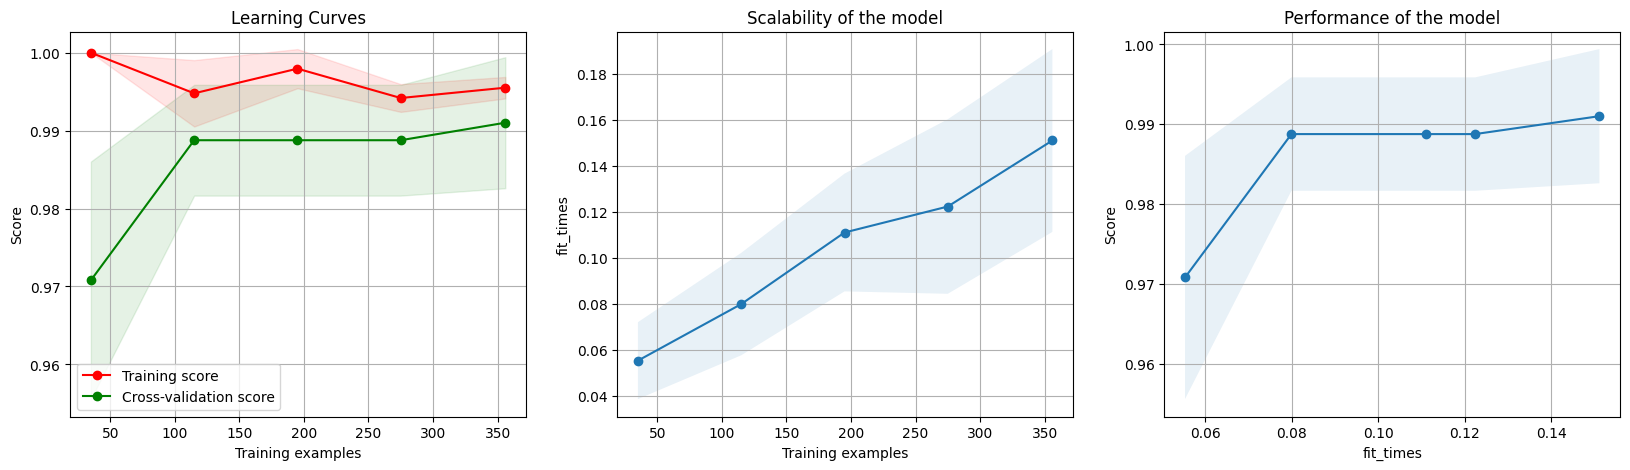

In [26]:
from plot_learning_curve import plot_learning_curve

plot_learning_curve(best_model, 'Learning Curves',
                    X_train, y_train, n_jobs=-1)

### training on just the tfidf and text features

In [7]:
import ast

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')



df_fe = pd.read_csv('spam_bert_tfe.csv')
df_fe['message_features'] = df_fe['message_features'].apply(ast.literal_eval)


df_fe = pd.DataFrame(df_fe['message_features'].apply(pd.Series))
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
sp = SpacyPreprocessor('en_core_web_sm')
df['message'] = sp.transform(df['message'].values)




df_fe = df_fe.iloc[:, :12]
df_fe.head()

df_fe['label'] = df['label']
df_fe['message'] = df['message']


df_fe.columns = df_fe.columns.astype(str)
sampled_df = df_fe.sample(frac=0.1, random_state=42)
X = sampled_df.drop(columns=['label'])
y= sampled_df['label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_clf = LogisticRegression()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Define parameter grids for grid search
param_grids = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C values for Logistic Regression
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C and gamma values for SVC
    {'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30]},  # max_depth values for Decision Tree
    {'classifier__n_estimators': [10, 50, 100, 200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2']}  # n_estimators and max_features values for Random Forest
]

# List of classifiers and corresponding parameter grids
classifiers = [log_reg_clf, svc_clf, dt_clf, rf_clf]
import joblib

best_weighted_f1_score = 0
best_model = None
best_clf_name = None

tfidf_transformer = TfidfVectorizer()

scaler = StandardScaler()

# Define ColumnTransformer for applying transformers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf_transformer, 'message'),  # Assuming 'message' is the column name containing text data
        ('scaler', scaler, [col for col in X.columns if col != 'message'])  # Applying scaler to numerical columns
    ],
    remainder='passthrough'  # Ensure other columns not mentioned are passed through
)

for classifier, param_grid in zip(classifiers, param_grids):
    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted',n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Classifier:", classifier.__class__.__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------\n")

    # Save the best model if it achieves a higher accuracy
    if accuracy > best_weighted_f1_score:
        best_weighted_f1_score = accuracy
        best_model = grid_search.best_estimator_
        best_clf_name = classifier.__class__.__name__


# Save the best model
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_clf_name}_fe_full_no_bert.joblib")
    print(f"Best model saved as best_model_{best_clf_name}_fe_full_no_bert.joblib")

# Reload the best model
best_model = joblib.load(f"best_model_{best_clf_name}_fe_full_no_bert.joblib")

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data using the best model:", accuracy)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classifier: LogisticRegression
Best Parameters: {'classifier__C': 1000}
Accuracy: 0.9732142857142857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.92      0.85      0.88        13

    accuracy                           0.97       112
   macro avg       0.95      0.92      0.93       112
weighted avg       0.97      0.97      0.97       112

-------------------------------------------

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Classifier: SVC
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.001}
Accuracy: 0.9732142857142857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.92      0.85      0.88        13

    accuracy                           0.97       112
   macro avg       0.95      0.92      0.93       112
weighted avg       0

##plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

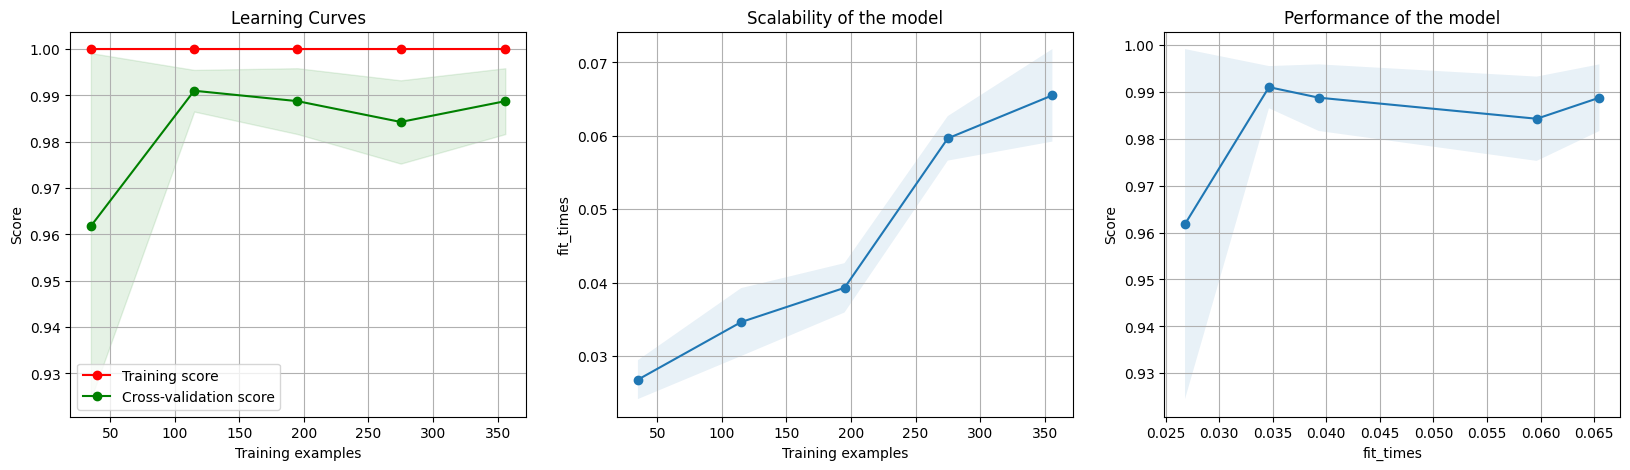

In [28]:
from plot_learning_curve import plot_learning_curve
plot_learning_curve(best_model, 'Learning Curves',
                    X_train, y_train, n_jobs=-1)

# sandbox


In [ ]:
# import ast

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # from sklearn.externals import joblib
# import warnings
# warnings.filterwarnings('ignore')



# df_fe = pd.read_csv('spam_bert_tfe.csv')
# df_fe['message_features'] = df_fe['message_features'].apply(ast.literal_eval)


# df_fe = pd.DataFrame(df_fe['message_features'].apply(pd.Series))
# df = pd.read_csv("spam.csv", encoding='latin1')

# # Keep only the necessary columns and rename them
# df = df[['v1', 'v2']]
# df.columns = ['label', 'message']

# # Convert labels to numerical values
# df['label'] = df['label'].map({'ham': 0, 'spam': 1})




# # df_fe = df_fe.iloc[:, :12]
# # df_fe.head()

# df_fe['label'] = df['label']
# df_fe['message'] = df['message']



# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # from sklearn.externals import joblib
# import warnings
# warnings.filterwarnings('ignore')
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.compose import ColumnTransformer
# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.experimental import enable_halving_search_cv # noqa
# from sklearn.model_selection import HalvingGridSearchCV



# df_fe.columns = df_fe.columns.astype(str)
# sampled_df = df_fe.sample(frac=1, random_state=42)
# X = sampled_df.drop(columns=['label'])
# y= sampled_df['label']


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# log_reg_clf = LogisticRegression()
# svc_clf = SVC()
# dt_clf = DecisionTreeClassifier()
# rf_clf = RandomForestClassifier()

# # Define parameter grids for grid search
# param_grids = [
#     {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C values for Logistic Regression
#     # {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},  # C and gamma values for SVC
#     {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma': [ 0.01, 0.1, 1, 10, 100]},  # C and gamma values for SVC

#     {'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30]},  # max_depth values for Decision Tree
#     {'classifier__n_estimators': [10, 50, 100, 200, 500], 'classifier__max_features': ['auto', 'sqrt', 'log2']}  # n_estimators and max_features values for Random Forest
# ]

# # List of classifiers and corresponding parameter grids
# classifiers = [log_reg_clf, svc_clf, dt_clf, rf_clf]
# import joblib

# best_weighted_f1_score = 0
# best_model = None
# best_clf_name = None

# tfidf_transformer = TfidfVectorizer()

# scaler = StandardScaler()

# # Define ColumnTransformer for applying transformers to specific columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('tfidf', tfidf_transformer, 'message'),  # Assuming 'message' is the column name containing text data
#         ('scaler', scaler, [col for col in X.columns if col != 'message'])  # Applying scaler to numerical columns
#     ],
#     remainder='passthrough'  # Ensure other columns not mentioned are passed through
# )

# for classifier, param_grid in zip(classifiers, param_grids):
#     pipeline = Pipeline([
#       ('preprocessor', preprocessor),
#       ('classifier', classifier)
#     ])

#     grid_search = HalvingGridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted',n_jobs=-1, verbose=1)
#     grid_search.fit(X_train, y_train)

#     y_pred = grid_search.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print("Classifier:", classifier.__class__.__name__)
#     print("Best Parameters:", grid_search.best_params_)
#     print("Accuracy:", accuracy)
#     print(classification_report(y_test, y_pred))
#     print("-------------------------------------------\n")

#     # Save the best model if it achieves a higher accuracy
#     if accuracy > best_weighted_f1_score:
#         best_weighted_f1_score = accuracy
#         best_model = grid_search.best_estimator_
#         best_clf_name = clf_name

# # Save the best model
# if best_model is not None:
#     joblib.dump(best_model, f"best_model_{best_clf_name}_big_data_fe_full.joblib")
#     print(f"Best model saved as best_model_{best_clf_name}_big_data_fe_full.joblib")

# # Reload the best model
# best_model = joblib.load(f"best_model_{best_clf_name}_big_data_fe_full.joblib")

# # Make predictions on the test data using the best model
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on test data using the best model:", accuracy)
# print(classification_report(y_test, y_pred))

# # from plot_learning_curve import plot_learning_curve
# # plot_learning_curve(best_model, 'Learning Curves',
# #                     X_train, y_train, n_jobs=-1)

In [ ]:
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from gensim.models import KeyedVectors
# from gensim.models.fasttext import FastText
# import transformers
# import torch

# class SparseEmbeddingExtractor:
#     def __init__(self, embedding_type='tfidf', embedding_dim=100, embedding_model=None):
#         """
#         Initialize SparseEmbeddingExtractor.

#         Parameters:
#         - embedding_type (str): Type of embedding technique to use. Options: 'tfidf', 'word2vec', 'glove', 'fasttext', 'bert'.
#         - embedding_dim (int): Dimensionality of the embeddings.
#         - embedding_model (str or object): Path to the pre-trained embedding model file (if applicable) or pre-loaded embedding model object.
#         """
#         self.embedding_type = embedding_type
#         self.embedding_dim = embedding_dim
#         self.embedding_model = embedding_model

#         if self.embedding_type == 'word2vec':
#             self.word2vec_model = KeyedVectors.load_word2vec_format(self.embedding_model, binary=True)
#         elif self.embedding_type == 'glove':
#             self.glove_model = KeyedVectors.load_word2vec_format(self.embedding_model, binary=False)
#         elif self.embedding_type == 'fasttext':
#             self.fasttext_model = FastText.load_fasttext_format(self.embedding_model)
#         elif self.embedding_type == 'bert':
#             self.tokenizer = transformers.AutoTokenizer.from_pretrained(self.embedding_model)
#             self.bert_model = transformers.AutoModel.from_pretrained(self.embedding_model)

#     def _tokenize(self, text):
#         if self.embedding_type == 'bert':
#             return self.tokenizer.tokenize(text)
#         else:
#             return text.split()

#     def _get_word_embeddings(self, tokens):
#         embeddings = []
#         for token in tokens:
#             if self.embedding_type == 'word2vec':
#                 if token in self.word2vec_model.vocab:
#                     embeddings.append(self.word2vec_model[token])
#                 else:
#                     embeddings.append(np.zeros(self.embedding_dim))
#             elif self.embedding_type == 'glove':
#                 if token in self.glove_model.vocab:
#                     embeddings.append(self.glove_model[token])
#                 else:
#                     embeddings.append(np.zeros(self.embedding_dim))
#             elif self.embedding_type == 'fasttext':
#                 embeddings.append(self.fasttext_model.wv[token])
#             elif self.embedding_type == 'bert':
#                 input_ids = torch.tensor(self.tokenizer.encode(token)).unsqueeze(0)
#                 with torch.no_grad():
#                     last_hidden_states = self.bert_model(input_ids)[0]
#                 embeddings.append(last_hidden_states.mean(1).numpy()[0])

#         return np.array(embeddings)

#     def _get_char_embeddings(self, text):
#         char_embeddings = np.zeros((len(text), self.embedding_dim))
#         for i, char in enumerate(text):
#             char_embeddings[i] = np.random.rand(self.embedding_dim)  # Placeholder, can be replaced with more sophisticated techniques
#         return char_embeddings

#     def _get_subword_embeddings(self, text):
#         subword_embeddings = np.zeros((len(text), self.embedding_dim))
#         for i, subword in enumerate(text):
#             subword_embeddings[i] = np.random.rand(self.embedding_dim)  # Placeholder, can be replaced with more sophisticated techniques
#         return subword_embeddings

#     def extract_sparse_embeddings(self, text):
#         """
#         Extract sparse embeddings from the given text.

#         Parameters:
#         - text (str): Input text.

#         Returns:
#         - embeddings (numpy.ndarray): Sparse embeddings of the text.
#         """
#         tokens = self._tokenize(text)

#         if self.embedding_type in ['word2vec', 'glove', 'fasttext', 'bert']:
#             embeddings = self._get_word_embeddings(tokens)
#         elif self.embedding_type == 'tfidf':
#             vectorizer = TfidfVectorizer(max_features=self.embedding_dim)
#             X = vectorizer.fit_transform([text])
#             embeddings = X.toarray()[0]
#         elif self.embedding_type == 'bow':
#             vectorizer = CountVectorizer(max_features=self.embedding_dim)
#             X = vectorizer.fit_transform([text])
#             embeddings = X.toarray()[0]
#         elif self.embedding_type == 'char':
#             embeddings = self._get_char_embeddings(text)
#         elif self.embedding_type == 'subword':
#             embeddings = self._get_subword_embeddings(tokens)

#         return embeddings

# # Example Usage:
# # Initialize the SparseEmbeddingExtractor
# extractor = SparseEmbeddingExtractor(embedding_type='bert', embedding_model='bert-base-uncased')

# # Extract sparse embeddings from text
# text = "This is a sample text for testing."
# embeddings = extractor.extract_sparse_embeddings(text)
# print(embeddings)
